In [ ]:
# The cell below contains the code necessary to read in the data from the source and add it to the new data frame for analysis
# The add_data function takes a url and the month and year marker
# It then finds the specific table needed on the url, sums the desired column, and adds this sum as a new line in the established data frame
# The url_reader function builds a pattern for the urls so that each url can be read in automatically
# It takes in the start year and end year (end year not inclusive)
# It then runs a for loop that composes the unique urls each time based on the month and year
# This url is then run through the add_data function inside the for loop
# This allows all 131 months to be read into the data frame in a single executeable command
# The cell after simply prints the collected data to check that it was correctly read in

In [2]:
import pandas as pd
import lxml

monthly_totals = pd.DataFrame()

def add_data (url, month, monthly_totals):
    dfs = pd.read_html(url)
    units = dfs[1]["Est. units"].sum()
    df = pd.DataFrame({'Month': [month], 'Total Units': [units]})
    return monthly_totals.append(df, ignore_index=True)
  

def url_reader(startyear: int, endyear: int, monthly_totals):
    month_dict = {1: "January", 2: "February", 3: "March", 4: "April", 5: "May", 6: "June", 7: "July", 8: "August",
                  9: "September", 10: "October", 11: "November", 12: "December"}

    base_url = "https://www.comichron.com/monthlycomicssales/"

    for year in range(startyear, endyear):
        for month_int, month_string in month_dict.items():
            composed_url = "%s%s/%d-%02d.html" % (base_url, year, year, month_int)
            month_string_composed = "%s %d" % (month_string, year)
            monthly_totals = add_data(composed_url,month_string_composed, monthly_totals)
    return monthly_totals

monthly_totals = url_reader(2008, 2019, monthly_totals)

In [79]:
print(monthly_totals)

              Month  Total Units
0      January 2008      6758510
1     February 2008      6263447
2        March 2008      6085527
3        April 2008      6710695
4          May 2008      7059459
5         June 2008      6660454
6         July 2008      7197689
7       August 2008      6862452
8    September 2008      6776074
9      October 2008      7528970
10    November 2008      5764718
11    December 2008      7674266
12     January 2009      5620425
13    February 2009      5633432
14       March 2009      5323267
15       April 2009      6732481
16         May 2009      5660231
17        June 2009      6566563
18        July 2009      6910121
19      August 2009      6770515
20   September 2009      7054782
21     October 2009      6204020
22    November 2009      6191111
23    December 2009      6312225
24     January 2010      5630189
25    February 2010      5387060
26       March 2010      6048434
27       April 2010      5567648
28         May 2010      6148778
29        

In [11]:
# Import matplotlib and seaborn packages for graphing purposes
# Set graphs to show inline so that graphs appear after cells
# Set graph sizes so they generate in a large size
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
plt.rcParams['figure.figsize'] = [20, 20]

In [4]:
# Read in movies data set 
# Remove erroneous blank columns
# Print data set to check for completeness
# A dummy variable was initially incuded to allow for ease of plotting, but was not further implemented
# Gross income for each film also included but was not used
movies = pd.read_csv('MarvelMovies.csv', sep=",")
movies.drop('Unnamed: 4', axis=1, inplace=True) 
movies.drop('Unnamed: 5', axis=1, inplace=True)
print(movies)

                                 Title          Month  Gross Income     Dummy
0                             Iron Man       May 2008     318412101  10000000
1                  The Incredible Hulk      June 2008     134806913  10000000
2                           Iron Man 2       May 2010     312433331  10000000
3                                 Thor       May 2011     181030624  10000000
4   Captain America: The First Avenger      July 2011     176654505  10000000
5                Marvel's The Avengers       May 2012     623357910  10000000
6                           Iron Man 3       May 2013     409013994  10000000
7                 Thor: The Dark World  November 2013     206362140  10000000
8      Captain America: Winter Soldier     April 2014     259766572  10000000
9              Guardians of the Galaxy    August 2014     333176600  10000000
10             Avengers: Age of Ultron       May 2015     459005868  10000000
11                             Ant-Man      July 2015     180202

In [5]:
# Merge the monthly totals data set with the movies data set so that an extra column for plotting is made
# Only months that have a movie release will have a value in this new column
result = pd.merge(monthly_totals, movies[['Month', 'Dummy']], left_on='Month', right_on='Month', how='left')
# Month names need to be rewritten to preserve the integrity of the data set
# Results are printed to check for accuracy
result = result.where(result['Dummy']!=10000000, result['Total Units'], axis=0)
result.loc[4,'Month'] = 'May 2008'
result.loc[5,'Month'] = 'June 2008'
result.loc[28,'Month'] = 'May 2010'
result.loc[40,'Month'] = 'May 2011'
result.loc[42,'Month'] = 'July 2011'
result.loc[52,'Month'] = 'May 2012'
result.loc[64,'Month'] = 'May 2013'
result.loc[70,'Month'] = 'November 2013'
result.loc[75,'Month'] = 'April 2014'
result.loc[79,'Month'] = 'August 2014'
result.loc[88,'Month'] = 'May 2015'
result.loc[90,'Month'] = 'July 2015'
result.loc[100,'Month'] = 'May 2016'
result.loc[106,'Month'] = 'November 2016'
result.loc[112,'Month'] = 'May 2017'
result.loc[114,'Month'] = 'July 2017'
result.loc[118,'Month'] = 'November 2017'
result.loc[121,'Month'] = 'February 2018'
result.loc[123,'Month'] = 'April 2018'
result.loc[126,'Month'] = 'July 2018'
print(result)

              Month  Total Units      Dummy
0      January 2008      6758510        NaN
1     February 2008      6263447        NaN
2        March 2008      6085527        NaN
3        April 2008      6710695        NaN
4          May 2008      7059459  7059459.0
5         June 2008      6660454  6660454.0
6         July 2008      7197689        NaN
7       August 2008      6862452        NaN
8    September 2008      6776074        NaN
9      October 2008      7528970        NaN
10    November 2008      5764718        NaN
11    December 2008      7674266        NaN
12     January 2009      5620425        NaN
13    February 2009      5633432        NaN
14       March 2009      5323267        NaN
15       April 2009      6732481        NaN
16         May 2009      5660231        NaN
17        June 2009      6566563        NaN
18        July 2009      6910121        NaN
19      August 2009      6770515        NaN
20   September 2009      7054782        NaN
21     October 2009      6204020

Text(0.5, 1.0, 'Total Units of Comics Sold Per Month')

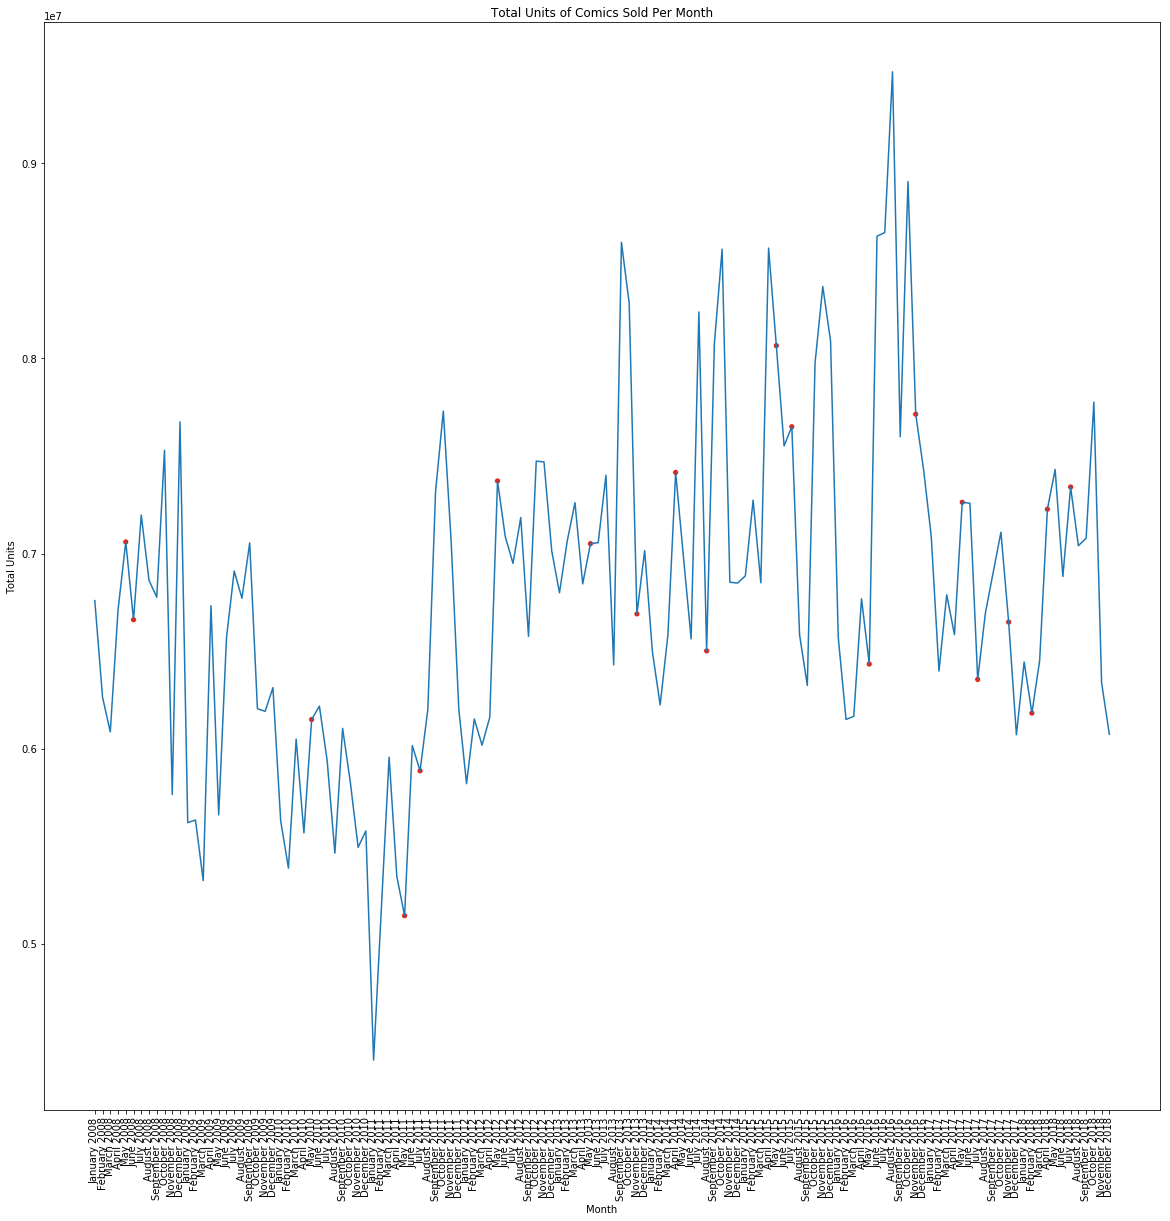

In [12]:
# Code generates line graph showing total units of comics sold for each month
# The placeholder variable crated above allows for a scatterplot to be overlaid on the line graph for each month that had a film release
# Other lines of code are for stylistic and ease of viewing

sns.lineplot(x='Month', y='Total Units', data=result, sort=False)
plt.xticks(rotation=90)
red = ['#E82316','#E82316','#E82316','#E82316','#E82316','#E82316','#E82316','#E82316','#E82316','#E82316','#E82316','#E82316','#E82316','#E82316','#E82316','#E82316','#E82316','#E82316','#E82316','#E82316']
sns.scatterplot(x='Month', y='Dummy', data=result, hue='Dummy', legend=False, palette = red)
plt.ylabel('Total Units')
plt.title('Total Units of Comics Sold Per Month')
